## Libraries

In [17]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [18]:
# Import plotting library
import matplotlib.pyplot as plt

# Exercice 7 -TD1 <br>
## Dégâts matériels moyens des Tornades au Etats-Unis

### Data Collection

In [19]:
# Data Collection

states = ["Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", "Delaware", "Florida", "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana", "Maine", "Maryland", "Massachusetts", "Michigan", "Minnesota", "Mississippi", "Missouri", "Montana", "Nebraska", "Nevada", "New Hampshire", "New Jersey", "New Mexico", "New York", "North Carolina", "North Dakota", "Ohio", "Oklahoma", "Oregon", "Pennsylvania","Puerto Rico", "Rhode Island","South Carolina" ,"South Dakota","Tennessee", "Texas", "Utah", "Vermont", "Virginia", "Washington", "West Virginia", "Wisconsin", "Wyoming"]
damages = [51.88, 0.00, 3.47, 40.96, 3.68, 4.62, 2.26, 0.27, 37.32, 51.68, 0.34, 0.26, 62.94, 53.13, 49.51, 49.28, 24.84, 27.75, 0.53, 2.33, 4.42, 29.88, 84.84, 43.62, 68.93, 2.27, 30.26, 0.10, 0.66, 2.94, 1.49, 15.73, 14.90, 14.69, 44.36, 81.94, 5.52, 17.11, 0.05, 0.09, 17.19, 10.64, 23.47, 88.60, 3.57, 0.24, 7.42, 2.37, 2.14, 31.33, 1.78]

data = {}
for i in range(len(states)):
    data[states[i]] = damages[i]


for state, damage in data.items():
    print(f"{state}: {damage}")



Alabama: 51.88
Alaska: 0.0
Arizona: 3.47
Arkansas: 40.96
California: 3.68
Colorado: 4.62
Connecticut: 2.26
Delaware: 0.27
Florida: 37.32
Georgia: 51.68
Hawaii: 0.34
Idaho: 0.26
Illinois: 62.94
Indiana: 53.13
Iowa: 49.51
Kansas: 49.28
Kentucky: 24.84
Louisiana: 27.75
Maine: 0.53
Maryland: 2.33
Massachusetts: 4.42
Michigan: 29.88
Minnesota: 84.84
Mississippi: 43.62
Missouri: 68.93
Montana: 2.27
Nebraska: 30.26
Nevada: 0.1
New Hampshire: 0.66
New Jersey: 2.94
New Mexico: 1.49
New York: 15.73
North Carolina: 14.9
North Dakota: 14.69
Ohio: 44.36
Oklahoma: 81.94
Oregon: 5.52
Pennsylvania: 17.11
Puerto Rico: 0.05
Rhode Island: 0.09
South Carolina: 17.19
South Dakota: 10.64
Tennessee: 23.47
Texas: 88.6
Utah: 3.57
Vermont: 0.24
Virginia: 7.42
Washington: 2.37
West Virginia: 2.14
Wisconsin: 31.33
Wyoming: 1.78


1-Les 5 états ayant subi les plus gros dégâts matériels

In [20]:
# We can also use (nlargest, pandas)
data_sorted = sorted(data.items(), key=lambda x: x[1], reverse=True)

print("5 most damaged states: ")
for i in range (5):
    print(data_sorted[i])
    

5 most damaged states: 
('Texas', 88.6)
('Minnesota', 84.84)
('Oklahoma', 81.94)
('Missouri', 68.93)
('Illinois', 62.94)


2-Histogramme des données avec des classes d'amplitude 10

In [21]:
classes = []

# Calcul de l'étendue des données
min_damage = min(value for state, value in data.items())
max_damage = max(value for state, value in data.items())
etendue = max_damage - min_damage

print(f"Etendue : {etendue}")

# Bornes des classes
current = min_damage
while current <= max_damage:
    classes.append((current, current + 10))
    current += 10

data_classed = {c: [] for c in classes}

# Créer les classes d'amplitude 10
class_counts = [0] * len(classes)
for state, damage in data.items():
    for i, (lower, upper) in enumerate(classes):
        if lower <= damage < upper:
            data_classed[(lower, upper)].append((state, damage))
            class_counts[i] += 1
            break

for i, (lower, upper) in enumerate(classes):
    print(f"Class {i+1}: [{lower}, {upper}) - {class_counts[i]} states")
    print(data_classed[(lower, upper)])




Etendue : 88.6
Class 1: [0.0, 10.0) - 25 states
[('Alaska', 0.0), ('Arizona', 3.47), ('California', 3.68), ('Colorado', 4.62), ('Connecticut', 2.26), ('Delaware', 0.27), ('Hawaii', 0.34), ('Idaho', 0.26), ('Maine', 0.53), ('Maryland', 2.33), ('Massachusetts', 4.42), ('Montana', 2.27), ('Nevada', 0.1), ('New Hampshire', 0.66), ('New Jersey', 2.94), ('New Mexico', 1.49), ('Oregon', 5.52), ('Puerto Rico', 0.05), ('Rhode Island', 0.09), ('Utah', 3.57), ('Vermont', 0.24), ('Virginia', 7.42), ('Washington', 2.37), ('West Virginia', 2.14), ('Wyoming', 1.78)]
Class 2: [10.0, 20.0) - 6 states
[('New York', 15.73), ('North Carolina', 14.9), ('North Dakota', 14.69), ('Pennsylvania', 17.11), ('South Carolina', 17.19), ('South Dakota', 10.64)]
Class 3: [20.0, 30.0) - 4 states
[('Kentucky', 24.84), ('Louisiana', 27.75), ('Michigan', 29.88), ('Tennessee', 23.47)]
Class 4: [30.0, 40.0) - 3 states
[('Florida', 37.32), ('Nebraska', 30.26), ('Wisconsin', 31.33)]
Class 5: [40.0, 50.0) - 5 states
[('Arkans

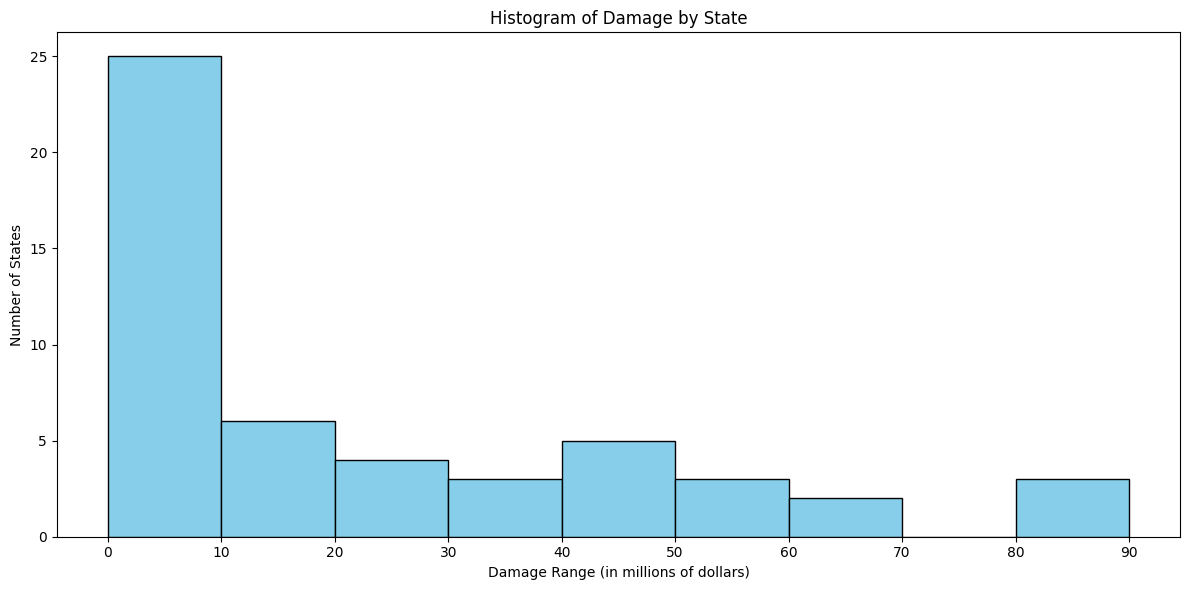

In [22]:
counts = class_counts

# Get the class boundaries for ticks (separations between bands)
tick_positions = [lower for lower, upper in classes] + [classes[-1][1]]
tick_labels = [f"{int(b)}" for b in tick_positions]

# Bar positions: center each bar between its lower and upper bound
bar_lefts = [lower for lower, upper in classes]
bar_width = [upper - lower for lower, upper in classes]

plt.figure(figsize=(12, 6))
plt.bar(bar_lefts, counts, width=bar_width, align='edge', color='skyblue', edgecolor='black')

plt.xlabel('Damage Range (in millions of dollars)')
plt.ylabel('Number of States')
plt.title('Histogram of Damage by State')

plt.xticks(tick_positions, tick_labels)

plt.tight_layout()
plt.show()


In [23]:
# Calculer les fréquences des classes
n = len(states)
frequencies = {c: 0 for c in classes}

for i in range(len(classes)):
    frequencies[i] = class_counts[i] / n
    
for i, (lower, upper) in enumerate(classes):
    print(f"Class {i+1}: [{lower:.0f}, {upper:.0f}) - Frequency: {frequencies[i]:.2f}")


Class 1: [0, 10) - Frequency: 0.49
Class 2: [10, 20) - Frequency: 0.12
Class 3: [20, 30) - Frequency: 0.08
Class 4: [30, 40) - Frequency: 0.06
Class 5: [40, 50) - Frequency: 0.10
Class 6: [50, 60) - Frequency: 0.06
Class 7: [60, 70) - Frequency: 0.04
Class 8: [70, 80) - Frequency: 0.00
Class 9: [80, 90) - Frequency: 0.06


In [24]:
# Calculate frequency of damages
total_damage = sum(damages)
damage_freq = {state: damage/total_damage for state, damage in zip(states, damages)}

print(damage_freq)

{'Alabama': 0.046337977849231875, 'Alaska': 0.0, 'Arizona': 0.0030993211861379067, 'Arkansas': 0.03658449446230797, 'California': 0.0032868881743479818, 'Colorado': 0.004126473740621651, 'Connecticut': 0.002018578063594141, 'Delaware': 0.0002411575562700965, 'Florida': 0.03333333333333333, 'Georgia': 0.04615934262236513, 'Hawaii': 0.00030367988567345483, 'Idaho': 0.00023222579492675958, 'Illinois': 0.056216505894962486, 'Indiana': 0.04745444801714899, 'Iowa': 0.044221150410861026, 'Kansas': 0.04401571989996428, 'Kentucky': 0.022186495176848876, 'Louisiana': 0.024785637727759918, 'Maine': 0.00047338335119685607, 'Maryland': 0.0020811003929974994, 'Massachusetts': 0.003947838513754913, 'Michigan': 0.026688102893890675, 'Minnesota': 0.07577706323687032, 'Mississippi': 0.03896034297963558, 'Missouri': 0.0615666309396213, 'Montana': 0.002027509824937478, 'Nebraska': 0.02702750982493748, 'Nevada': 8.931761343336907e-05, 'New Hampshire': 0.0005894962486602359, 'New Jersey': 0.0026259378349410

In [25]:
lower = min(damages)
upper = max(damages)

#Médiane de la distribution
sorted_damages = sorted(damages)
if n % 2 == 1:
    median = sorted_damages[n//2]
else:
    median = (sorted_damages[n//2 - 1] + sorted_damages[n//2]) / 2
print(f"Médiane des dégâts: {median:.2f} millions de dollars")

# Moyenne de la distribution

mean = sum(sorted_damages) / n
print(f"Moyenne des dégâts: {mean:.2f} millions de dollars")


Médiane des dégâts: 10.64 millions de dollars
Moyenne des dégâts: 21.95 millions de dollars


## Variance et Ecart-Type

In [26]:
s = 0
moyenne = sum(damage for damage in damages) / n

for i in range(len(damages)):
    t = (damages[i] - moyenne) ** 2
    s += t
    
variance = s / n
ecart = variance ** 0.5 

print(f"Variance: {variance}")
print(f"Ecart-Type: {ecart}")

Variance: 631.8144364475202
Ecart-Type: 25.135919248110266


### Paramètres de forme

In [27]:
# Coefficient d'asymétrie de Fisher
gamma = sum(((damage - moyenne) / ecart)**3 for damage in damages) / n


print(f"Coefficient d'asymétrie de Fisher: {gamma}")

if gamma == 0:
    print("Distribution symétrique")
elif gamma < 0:
    print("Distribution asymétrique à gauche")
else:
    print("Distribution asymétrique à droite")
    
# Coefficients d'applatissement
beta_p = sum((damages[i] - moyenne)**4 for i in range(len(damages))) / (n * ecart**4)
beta_f = beta_p - 3 

print(f"Coefficient d'applatissement de Pearson: {gamma}")
print(f"Coefficient d'applatissement de Fisher: {beta_f}")


Coefficient d'asymétrie de Fisher: 1.0970472132902396
Distribution asymétrique à droite
Coefficient d'applatissement de Pearson: 1.0970472132902396
Coefficient d'applatissement de Fisher: 0.16614384748862987


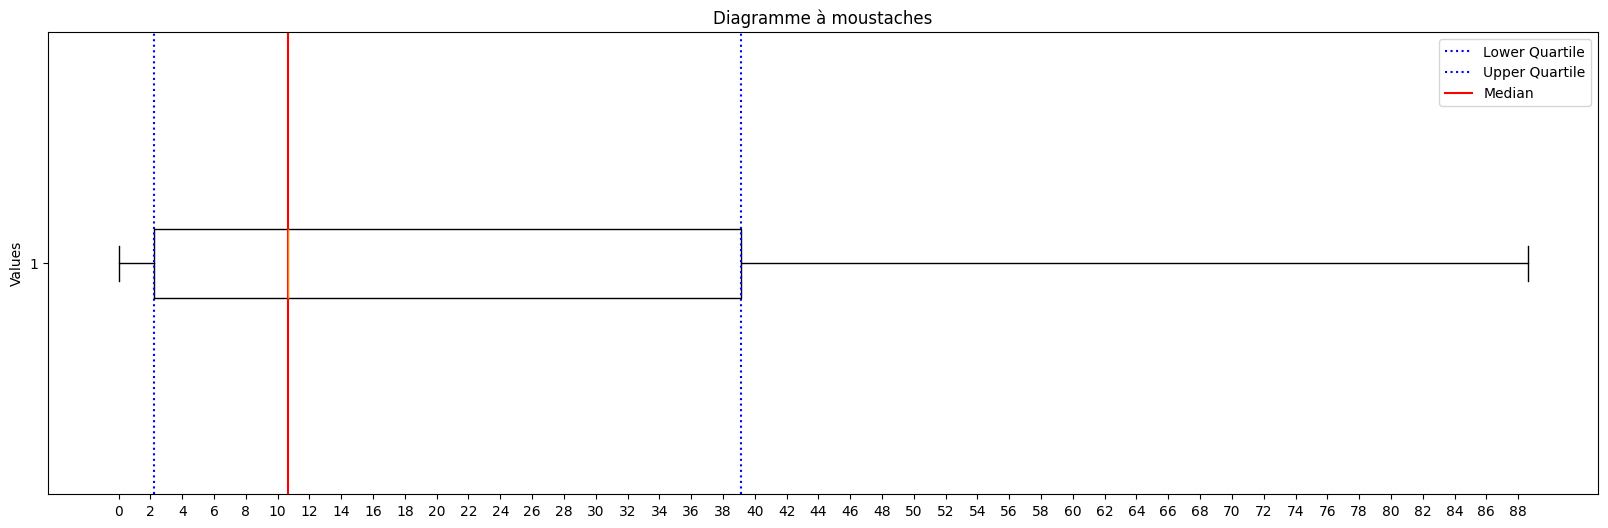

In [28]:
# Diagramme à moustaches

plt.figure(figsize=(20, 6))
box = plt.boxplot(damages, vert=False)
plt.title("Diagramme à moustaches")
plt.ylabel("Values")
plt.xticks(range(0, int(max(damages))+1, 2))
plt.axvline(x=box['boxes'][0].get_xdata()[0], color='b', linestyle=':', label='Lower Quartile')
plt.axvline(x=box['boxes'][0].get_xdata()[2], color='b', linestyle=':', label='Upper Quartile')
plt.axvline(x=box['medians'][0].get_xdata()[0], color='r', linestyle='-', label='Median')

plt.legend()
plt.show()
